## [D1110 과제]
- _데이터분석 
- - 대구지역의 기온 변화        (1) 지구온난화 현상
             => 다른 지역은?

[모듈 로딩 및 데이터 가져오기] <hr>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [23]:
data_path = '../Data/대구_1980_현재.csv'
daeguDF = pd.read_csv(data_path, skiprows=7)

data_path2 = '../Data/철원_1980_2025.csv'

cheolDF = pd.read_csv(data_path2, skiprows=7)
cheolDF

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1988-01-01,95,-3.1,-8.6,-1.0
1,\t1988-01-02,95,-2.8,-7.6,2.3
2,\t1988-01-03,95,-5.9,-12.3,1.1
3,\t1988-01-04,95,-3.4,-9.3,3.6
4,\t1988-01-05,95,-6.7,-13.5,3.6
...,...,...,...,...,...
13823,\t2025-11-05,95,6.9,-0.1,17.1
13824,\t2025-11-06,95,8.0,0.8,17.4
13825,\t2025-11-07,95,10.5,2.7,19.6
13826,\t2025-11-08,95,11.9,8.7,15.4


In [24]:
## 날짜 컬럼 공백 제거
daeguDF['날짜'] = daeguDF['날짜'].str.strip()
cheolDF['날짜'] = cheolDF['날짜'].str.strip()
# daeguDF['날짜'] = daeguDF['날짜'].astype('datetime64[ns]')
print(cheolDF.head())

## 지점 컬럼 삭제
daeguDF.drop(columns = '지점', inplace = True)
cheolDF.drop(columns = '지점', inplace = True)

print(cheolDF.head())

           날짜  지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0  1988-01-01  95     -3.1     -8.6     -1.0
1  1988-01-02  95     -2.8     -7.6      2.3
2  1988-01-03  95     -5.9    -12.3      1.1
3  1988-01-04  95     -3.4     -9.3      3.6
4  1988-01-05  95     -6.7    -13.5      3.6
           날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)
0  1988-01-01     -3.1     -8.6     -1.0
1  1988-01-02     -2.8     -7.6      2.3
2  1988-01-03     -5.9    -12.3      1.1
3  1988-01-04     -3.4     -9.3      3.6
4  1988-01-05     -6.7    -13.5      3.6


In [29]:
## 결측치 채우기
## 이전, 이후 값들의 평균값으로 결측치 채우기
# daeguDF.ffill(inplace=True) 
msDF = daeguDF[ daeguDF.isna().any(axis=1) ]
for idx in msDF.index :
    print(idx)
    ## 결측치인 컬럼명 가져오기
    cols = daeguDF.iloc[idx][daeguDF.iloc[idx].isna()].index
    print(cols)

    ## 결측치 존재 컬럼/행의 앞/뒤 3개행 선택 => 평균 : {컬럼명 : 평균값, ..}
    fill_values = daeguDF[cols].iloc[idx-1 : idx+2].mean(numeric_only=True).to_dict()
    daeguDF.iloc[idx] = daeguDF.iloc[idx].fillna(fill_values)

print(daeguDF.isna().sum())

## 날짜 컬럼 : object => str이지만 날짜를 의미 : datetime64[ns]
daeguDF.날짜 = pd.to_datetime(daeguDF['날짜'])

daeguDF.info()


## 결측치 채우기
## 이전, 이후 값들의 평균값으로 결측치 채우기
# daeguDF.ffill(inplace=True) 
msDF = cheolDF[ cheolDF.isna().any(axis=1) ]
for idx in msDF.index :
    print(idx)
    ## 결측치인 컬럼명 가져오기
    cols = cheolDF.iloc[idx][cheolDF.iloc[idx].isna()].index
    print(cols)

    ## 결측치 존재 컬럼/행의 앞/뒤 3개행 선택 => 평균 : {컬럼명 : 평균값, ..}
    fill_values = cheolDF[cols].iloc[idx-1 : idx+2].mean(numeric_only=True).to_dict()
    cheolDF.iloc[idx] = cheolDF.iloc[idx].fillna(fill_values)

print(cheolDF.isna().sum())

## 날짜 컬럼 : object => str이지만 날짜를 의미 : datetime64[ns]
cheolDF.날짜 = pd.to_datetime(cheolDF['날짜'])

cheolDF.info()

날짜           0
평균기온(℃)      0
최저기온(℃)      0
최고기온(℃)      0
is_summer    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16750 entries, 0 to 16749
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   날짜         16750 non-null  datetime64[ns]
 1   평균기온(℃)    16750 non-null  float64       
 2   최저기온(℃)    16750 non-null  float64       
 3   최고기온(℃)    16750 non-null  float64       
 4   is_summer  16750 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 654.4 KB
날짜         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       13828 non-null  datetime64[ns]
 1   평균기온(℃)  13828 non-null  float64       
 2   최저기온(℃)  13828 non-null  float64       
 3   최

In [30]:
## 평균기온 25도 이상은 여름으로 간주
## 대구 지역
daeguDF['is_summer'] = (daeguDF['평균기온(℃)'] >= 25).astype(int)
grouped_d = daeguDF.groupby(daeguDF['날짜'].dt.year)
d_summer_sum = grouped_d['is_summer'].sum()
print(d_summer_sum)

##철원 지역
cheolDF['is_summer'] = (cheolDF['평균기온(℃)'] >= 25).astype(int)
grouped_c = cheolDF.groupby(cheolDF['날짜'].dt.year)
c_summer_sum = grouped_c['is_summer'].sum()


test = daeguDF[daeguDF['날짜'].dt.year == 1993]
print(test['평균기온(℃)'].unique())


날짜
1980    19
1981    51
1982    41
1983    44
1984    51
1985    63
1986    39
1987    45
1988    41
1989    37
1990    67
1991    43
1992    51
1993    18
1994    76
1995    55
1996    47
1997    59
1998    50
1999    52
2000    68
2001    67
2002    46
2003    24
2004    49
2005    64
2006    49
2007    54
2008    57
2009    47
2010    81
2011    69
2012    60
2013    74
2014    51
2015    38
2016    58
2017    67
2018    63
2019    57
2020    54
2021    49
2022    73
2023    68
2024    92
2025    81
Name: is_summer, dtype: int64
[ 0.9  3.9  5.   1.5  1.   2.7  1.9  3.8  5.1  2.   0.7  0.2 -0.3 -3.3
 -2.5 -3.2 -4.4 -3.9 -3.7 -2.  -0.1  4.7  3.1 -3.5 -1.1  2.6  0.5  2.1
  4.4  6.7 13.8  5.2 -0.4  1.3  2.4  4.9  5.6  6.   8.3  7.5  5.9  5.5
  4.6  3.2 -2.1  0.3  1.6 -0.8  4.3  6.1  9.3  6.2  5.3  6.5  7.6  8.9
  4.8  3.4  6.4  6.9  7.9 10.8 11.   8.5 11.3 12.6 12.1 12.4  8.1  9.1
 13.5 14.7 15.3  9.5  9.9 10.7  7.8  7.1 12.2 14.8 16.  17.4 17.9 19.9
 21.  19.6 14.3 19.  21.1 18.3 13.3

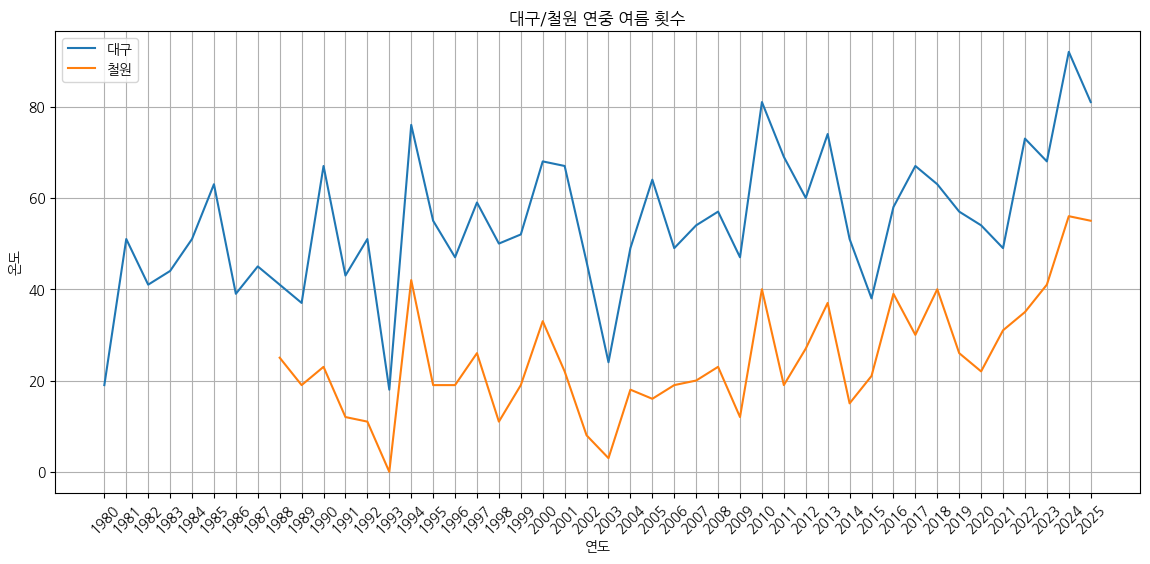

In [33]:
## 시각화 
plt.figure(figsize=(14,6))

plt.plot(d_summer_sum.index, d_summer_sum.values)
plt.plot(c_summer_sum.index, c_summer_sum.values)

plt.grid()
plt.xticks(d_summer_sum.index, rotation = 45)
plt.legend(['대구', '철원'])
plt.xlabel('연도')
plt.ylabel('온도')
plt.title('대구/철원 연중 여름 횟수')
plt.show()



